# Dependencies

In [77]:
import numpy as np
import pandas as pd
import sqlite3

import matplotlib.pyplot as plt

In [164]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.impute import SimpleImputer

In [109]:
import scipy as sp

In [127]:
np.random.seed(23)

# Get data

In [4]:
rawDf = pd.read_csv('./data/millionsongdataset_sample.csv')

In [8]:
rawDf.shape

(8234, 53)

In [9]:
rawDf.dtypes

analysis_sample_rate                int64
audio_md5                          object
danceability                      float64
duration                          float64
end_of_fade_in                    float64
energy                            float64
idx_bars_confidence                 int64
idx_bars_start                      int64
idx_beats_confidence                int64
idx_beats_start                     int64
idx_sections_confidence             int64
idx_sections_start                  int64
idx_segments_confidence             int64
idx_segments_loudness_max           int64
idx_segments_loudness_max_time      int64
idx_segments_loudness_start         int64
idx_segments_pitches                int64
idx_segments_start                  int64
idx_segments_timbre                 int64
idx_tatums_confidence               int64
idx_tatums_start                    int64
key                                 int64
key_confidence                    float64
loudness                          

In [20]:
rawDf.describe()

,analysis_sample_rate,danceability,duration,end_of_fade_in,energy,idx_bars_confidence,idx_bars_start,idx_beats_confidence,idx_beats_start,idx_sections_confidence,...,artist_latitude,artist_longitude,artist_playmeid,idx_artist_terms,idx_similar_artists,release_7digitalid,song_hotttnesss,track_7digitalid,idx_artist_mbtags,year
count,8234.0,8234.0,8234.000000,8234.000000,8234.0,8234.0,8234.0,8234.0,8234.0,8234.0,...,3087.000000,3087.000000,8234.000000,8234.0,8234.0,8234.000000,4629.000000,8.234000e+03,8234.0,8234.000000
mean,22050.0,0.0,238.290455,0.758585,0.0,0.0,0.0,0.0,0.0,0.0,...,37.223204,-63.716463,25533.738766,0.0,0.0,370668.458465,0.341856,4.119877e+06,0.0,928.972188
std,0.0,0.0,113.471704,1.864888,0.0,0.0,0.0,0.0,0.0,0.0,...,15.515183,51.054064,43834.952397,0.0,0.0,236997.592237,0.247268,2.630712e+06,0.0,996.247833
min,22050.0,0.0,1.044440,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,-41.280540,-162.436500,-1.000000,0.0,0.0,63.000000,0.000000,8.450000e+02,0.0,0.000000
25%,22050.0,0.0,175.542400,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,33.748310,-93.291560,-1.000000,0.0,0.0,172858.000000,0.000000,1.888023e+06,0.0,0.000000
50%,22050.0,0.0,222.680360,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,...,39.102950,-80.112780,2175.000000,0.0,0.0,331322.000000,0.360371,3.732560e+06,0.0,0.000000
75%,22050.0,0.0,276.335875,0.421000,0.0,0.0,0.0,0.0,0.0,0.0,...,43.648560,-8.936895,34172.000000,0.0,0.0,574072.500000,0.536789,6.376102e+06,0.0,2000.000000
max,22050.0,0.0,1819.767710,43.119000,0.0,0.0,0.0,0.0,0.0,0.0,...,69.651020,174.767140,242965.000000,0.0,0.0,823599.000000,1.000000,9.090443e+06,0.0,2010.000000


Some of these columns should not be numeric. I hope this is not a problem with processing.

In [26]:
(rawDf==0).sum()

analysis_sample_rate                 0
audio_md5                            0
danceability                      8234
duration                             0
end_of_fade_in                    2536
energy                            8234
idx_bars_confidence               8234
idx_bars_start                    8234
idx_beats_confidence              8234
idx_beats_start                   8234
idx_sections_confidence           8234
idx_sections_start                8234
idx_segments_confidence           8234
idx_segments_loudness_max         8234
idx_segments_loudness_max_time    8234
idx_segments_loudness_start       8234
idx_segments_pitches              8234
idx_segments_start                8234
idx_segments_timbre               8234
idx_tatums_confidence             8234
idx_tatums_start                  8234
key                                997
key_confidence                     433
loudness                             0
mode                              2569
mode_confidence          

Many are just empty.

## EDA

### Distribution of some features

(array([2.000e+00, 3.000e+00, 7.000e+00, 3.200e+01, 1.180e+02, 3.120e+02,
        9.080e+02, 2.417e+03, 3.764e+03, 6.710e+02]),
 array([-51.643 , -46.4221, -41.2012, -35.9803, -30.7594, -25.5385,
        -20.3176, -15.0967,  -9.8758,  -4.6549,   0.566 ]),
 <BarContainer object of 10 artists>)

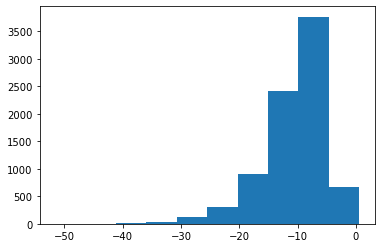

In [78]:
plt.hist(rawDf['loudness'])

(array([  21.,   89.,  446., 2304., 2397., 1635.,  889.,  350.,   80.,
          23.]),
 array([  0.    ,  26.2828,  52.5656,  78.8484, 105.1312, 131.414 ,
        157.6968, 183.9796, 210.2624, 236.5452, 262.828 ]),
 <BarContainer object of 10 artists>)

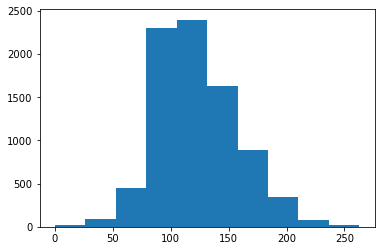

In [80]:
plt.hist(rawDf['tempo'])

(array([4404.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3830.]),
 array([   0.,  201.,  402.,  603.,  804., 1005., 1206., 1407., 1608.,
        1809., 2010.]),
 <BarContainer object of 10 artists>)

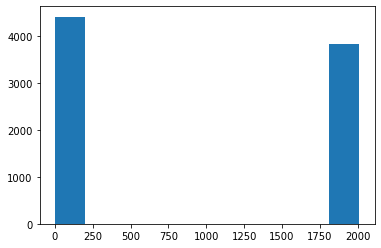

In [81]:
plt.hist(rawDf['year'])

In [84]:
rawDf[rawDf['year'] < 250]

,loudness,tempo,track_id,artist_familiarity,artist_hotttnesss,artist_id,artist_name,genre,song_hotttnesss,song_id,title,year
0,-12.446,93.331,TRAGAAF128F9338911,0.492441,0.338947,b'ARY1K701187B9A43A9',b'Joe McBride',b'',0.375984,SOFUWDG12A8C142F6D,b'This Is How A Heart Breaks',0
1,-8.925,129.493,TRAGACJ128F427118C,0.476969,0.358285,b'ARC28SN1187B989049',b'Greater Vision',b'',0.000000,SONJXBM12A8C13C358,"b""Heaven's Hero (Featuring Champion Of Love)""",0
5,-12.469,110.190,TRAGAHW12903CA6DBE,0.475458,0.309139,b'ARHDHOX122988F500E',b'Hot Club Of Detroit',b'',NaN,SOQTSEB12AB01884A0,b'Night Time',0
8,-3.761,190.922,TRAGANK128F428A5CD,0.850728,0.542055,b'ARF84A41187B9A34E7',b'Rancid',b'',0.616797,SOHLRVJ12A8C13A9A2,b'Black Lung (Album Version)',0
10,-4.625,185.409,TRAGBHV128F4295074,0.729149,0.522278,b'AR8ZQ9T1187FB56FE5',b'Goldfinger',b'',0.604789,SOHJYGD12A8C13CF7F,"b""I'm Down""",0
...,...,...,...,...,...,...,...,...,...,...,...,...
8224,-12.673,162.133,TRBIJFO128F42990C5,0.598237,0.363688,b'ARUUP4L1187B9B72EB',b'Diamanda Galas',b'',0.323112,SOILDRV12A8C13EB77,b'Dark End Of The Street',0
8226,-8.065,90.050,TRBIJIP128F9334953,0.334543,0.049034,b'AROIHOI122988FEB8E',b'Mario Rosenstock',b'',NaN,SOJARSR12AB0184939,b'Munster Song (Best of 2009)',0
8227,-11.756,119.271,TRBIJKN12903CBF11B,0.450646,0.331535,b'ARQ91R31187FB38A88',b'Grandpa Jones',b'',0.000000,SOUWMIW12AB0184748,b'Down In Dixie',0
8231,-12.087,118.123,TRBIJNK128F93093EC,0.433508,0.289903,b'ARS1DCR1187B9A4A56',b'Winston Reedy',b'',NaN,SOJZLAJ12AB017E8A2,b'Sentimental Man',0


In [110]:
sp.stats.describe(rawDf['year'])

DescribeResult(nobs=8234, minmax=(0, 2010), mean=928.9721884867622, variance=992509.7454914566, skewness=0.13995499490956384, kurtosis=-1.980157987076002)

In [111]:
rawDf[rawDf['year']<=1900].shape

(4404, 12)

Half of the sample set is before the year 1900

In [163]:
rawDf.isna().sum()

analysis_sample_rate                 0
audio_md5                            0
danceability                         0
duration                             0
end_of_fade_in                       0
energy                               0
idx_bars_confidence                  0
idx_bars_start                       0
idx_beats_confidence                 0
idx_beats_start                      0
idx_sections_confidence              0
idx_sections_start                   0
idx_segments_confidence              0
idx_segments_loudness_max            0
idx_segments_loudness_max_time       0
idx_segments_loudness_start          0
idx_segments_pitches                 0
idx_segments_start                   0
idx_segments_timbre                  0
idx_tatums_confidence                0
idx_tatums_start                     0
key                                  0
key_confidence                       0
loudness                             0
mode                                 0
mode_confidence          

Should not do this in production. But will try to impute to 0 in later step for POC modeling.

### Subset a few columns

In [38]:
df = rawDf[['loudness','tempo','track_id','artist_familiarity','artist_hotttnesss','artist_id','artist_name',
            'genre','song_hotttnesss','song_id','title']].copy()

In [147]:
df.head(5)

,loudness,tempo,track_id,artist_familiarity,artist_hotttnesss,artist_id,artist_name,genre,song_hotttnesss,song_id,title,year
0,-12.446,93.331,TRAGAAF128F9338911,0.492441,0.338947,b'ARY1K701187B9A43A9',b'Joe McBride',b'',0.375984,SOFUWDG12A8C142F6D,b'This Is How A Heart Breaks',0
1,-8.925,129.493,TRAGACJ128F427118C,0.476969,0.358285,b'ARC28SN1187B989049',b'Greater Vision',b'',0.000000,SONJXBM12A8C13C358,"b""Heaven's Hero (Featuring Champion Of Love)""",0
2,-5.893,160.158,TRAGACV128F1474DEC,0.530631,0.326236,b'AR5BLB01187FB57E99',b'Headliners',b'',0.638228,SOOTRFL12A6D4F5428,b'Sag Ihnen Bescheid',2005
3,-11.485,97.004,TRAGADP128EF341C7F,0.680620,0.440326,b'ART5IUL1187B9B0143',b'Lady Saw',b'',0.215080,SOVZVNF12A67ADA382,b'Bare As You Dare',1994
4,-10.011,107.657,TRAGAGQ128E0781352,0.719313,0.472748,b'ARYECDK1187FB45587',b'The Stranglers',b'',0.581494,SOHJRZY12A63110838,b'It Only Takes Two To Tango',1981


### Decode the IDs to literal string

In [40]:
df['track_id'] = df['track_id'].apply(lambda x: x[2:-1].encode().decode())

In [41]:
df.head(5)

,loudness,tempo,track_id,artist_familiarity,artist_hotttnesss,artist_id,artist_name,genre,song_hotttnesss,song_id,title,year
0,-12.446,93.331,TRAGAAF128F9338911,0.492441,0.338947,b'ARY1K701187B9A43A9',b'Joe McBride',b'',0.375984,b'SOFUWDG12A8C142F6D',b'This Is How A Heart Breaks',0
1,-8.925,129.493,TRAGACJ128F427118C,0.476969,0.358285,b'ARC28SN1187B989049',b'Greater Vision',b'',0.000000,b'SONJXBM12A8C13C358',"b""Heaven's Hero (Featuring Champion Of Love)""",0
2,-5.893,160.158,TRAGACV128F1474DEC,0.530631,0.326236,b'AR5BLB01187FB57E99',b'Headliners',b'',0.638228,b'SOOTRFL12A6D4F5428',b'Sag Ihnen Bescheid',2005
3,-11.485,97.004,TRAGADP128EF341C7F,0.680620,0.440326,b'ART5IUL1187B9B0143',b'Lady Saw',b'',0.215080,b'SOVZVNF12A67ADA382',b'Bare As You Dare',1994
4,-10.011,107.657,TRAGAGQ128E0781352,0.719313,0.472748,b'ARYECDK1187FB45587',b'The Stranglers',b'',0.581494,b'SOHJRZY12A63110838',b'It Only Takes Two To Tango',1981


In [42]:
df['song_id'] = df['song_id'].apply(lambda x: x[2:-1].encode().decode())

## Feature Engineering

### Filter for non-zero years

In [208]:
filtered_df = df[df['year'] > 0][['loudness', 'tempo', 'artist_hotttnesss', 'song_hotttnesss', 'artist_familiarity','year','genre']].copy()

In [209]:
scaler_step = Pipeline([
    ("imputer", SimpleImputer(strategy='constant', fill_value=0)),
    ("scaler", StandardScaler())
])

encoder_step = Pipeline([
    ("encoder", OneHotEncoder())
])

In [210]:
transformers = ColumnTransformer([
    ("scaler_process", scaler_step, ['loudness', 'tempo', 'artist_hotttnesss', 'song_hotttnesss', 'artist_familiarity']),
    ("encoder_process", encoder_step, ['year','genre'])
])

In [ ]:
toy_pipeline = Pipeline([
    ("processor", transformers),
    ("modeller", KMeans(random_state=23))
])

## Prep data set for training

#### Split the data

In [186]:
train_indices = np.random.choice(filtered_df.index, size=int(filtered_df.shape[0]*0.8), replace=False)

In [187]:
test_df = filtered_df[~filtered_df.index.isin(train_indices)]
train_df = filtered_df[filtered_df.index.isin(train_indices)]

#### Feed the train set to pipeline

In [188]:
toy_pipeline.fit(train_df)

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('scaler_process',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['loudness', 'tempo',
                                                   'artist_hotttnesss',
                                                   'song_hotttnesss',
                                                   'artist_familiarity']),
                                                 ('encoder_process',
                                                  Pipeline(steps=[('encoder',
                        

In [189]:
toy_pipeline.get_params()

{'memory': None,
 'steps': [('processor',
   ColumnTransformer(transformers=[('scaler_process',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(fill_value=0,
                                                                   strategy='constant')),
                                                    ('scaler', StandardScaler())]),
                                    ['loudness', 'tempo', 'artist_hotttnesss',
                                     'song_hotttnesss', 'artist_familiarity']),
                                   ('encoder_process',
                                    Pipeline(steps=[('encoder', OneHotEncoder())]),
                                    ['year', 'genre'])])),
  ('modeller', KMeans(random_state=23))],
 'verbose': False,
 'processor': ColumnTransformer(transformers=[('scaler_process',
                                  Pipeline(steps=[('imputer',
                                        

In [ ]:
# extract model
my_kmeans = toy_pipeline['modeller']

In [202]:
# extract transformer to transform data for scoring
transformed_train_df = toy_pipeline['processor'].fit_transform(train_df)

#### Scoring

In [205]:
silhouette_score(transformed_train_df, my_kmeans.labels_, metric='euclidean',sample_size=int(train_df.shape[0]*0.3))

0.1403434763910347

In [207]:
calinski_harabasz_score(transformed_train_df.toarray(), my_kmeans.labels_)

471.87767039472277

## Incorporate Lyrics to extract new feature ~ offensive lyrics tag

### Get lyrics

In [68]:
conn = sqlite3.connect('mxm_dataset.db')

In [69]:
cursor = conn.cursor()

In [70]:
test_select_query = f'SELECT word FROM lyrics WHERE track_id = "{df.iloc[3948,2]}"'

[('i',), ('the',), ('you',), ('to',), ('and',), ('a',), ('me',), ('it',), ('not',), ('in',), ('my',), ('is',), ('that',), ('do',), ('we',), ('am',), ('will',), ('all',), ('no',), ('be',), ('have',), ('love',), ('so',), ('know',), ('but',), ('with',), ('what',), ('just',), ('like',), ('now',), ('can',), ('go',), ('up',), ('get',), ('got',), ('feel',), ('want',), ('let',), ('make',), ('way',), ('say',), ('would',), ('ca',), ('away',), ('her',), ('heart',), ('how',), ('more',), ('gonna',), ('right',), ('been',), ('tell',), ('too',), ('find',), ('good',), ('about',), ('over',), ('into',), ('run',), ('has',), ('cri',), ('word',), ('much',), ('break',), ('start',), ('should',), ('without',), ('mine',), ('use',), ('fight',), ('sure',), ('happi',), ('hurt',), ('yet',), ('dear',), ('darl',), ('share',), ('guy',), ('suffer',), ('wide',), ('explain',), ('fals',), ('sheep',)]


In [ ]:
test_result = cursor.execute(test_select_query).fetchall()

In [ ]:
print(test_result)

### Create new song table from the df

In [ ]:
df.to_sql('songs',conn, 'append')

### Get only songs with lyrics

In [75]:
matched_lyrics_query = 'SELECT s.*, l.word, l.count, l.is_test FROM songs AS s LEFT JOIN lyrics AS l ON s.track_id = l.track_id'

173438

In [185]:
matched_df = cursor.execute(matched_lyrics_query).fetchall()

In [192]:
len(matched_df)